# Emotion Classifier using Convolutional Neural Network

## Import Libraries

In [29]:
import os
import random
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
training_dataset_dir = "Dataset/train"
testing_dataset_dir = "Dataset/test"
class_names = os.listdir("Dataset/train")

In [31]:
print(class_names)

['Happy', 'Sad']


In [32]:
def data_generator(training_data_dir, class_names):
    raw = []
    for cat in class_names:
        tmp = f'{training_dataset_dir}/{cat}'
        class_num = class_names.index(cat)
        for img_path in os.listdir(tmp):
            gray_img = cv.imread(f"{tmp}/{img_path}", cv.IMREAD_GRAYSCALE)
            if gray_img is None:
                print(f"Failed to read image: {tmp}/{img_path}")
                continue
            gray_img = gray_img/255.
            gray_img = cv.resize(gray_img, (48, 48))
            raw.append([gray_img, class_num])
    random.shuffle(raw)
    images = []
    labels = []
    
    for img, label in raw:
        images.append(img)
        labels.append(label)
    images = np.array(images).reshape(-1, 48, 48, 1)
    labels = np.array(labels)
    
    return images, labels

In [33]:
training_images, training_labels = data_generator(training_dataset_dir, class_names)
testing_images, testing_labels = data_generator(testing_dataset_dir, class_names)

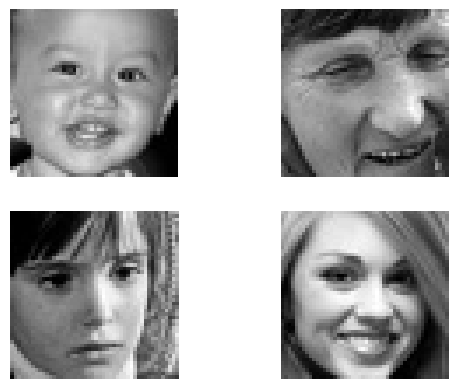

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Define an array of images (each image is represented by a numpy array)
#images = np.random.rand(4, 28, 28)  # 4 images of size 28x28
images = training_images[50:]
# Create a figure with a grid of subplots to display the images
fig, axes = plt.subplots(nrows=2, ncols=2)

# Flatten the axes array to iterate over each subplot
for ax, image in zip(axes.flatten(), images):
    ax.imshow(image, cmap='gray')  # Display the image in grayscale
    ax.axis('off')  # Hide the axes ticks and labels

plt.show()  # Show the figure with the images


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [50]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["accuracy"]
             )

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [52]:
history = model.fit(training_images, training_labels, epochs=100, verbose=1, validation_data=(testing_images, testing_labels))

Epoch 1/100
63/63 [==============================] - 11s 115ms/step - loss: 0.6938 - accuracy: 0.5110 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 9s 143ms/step - loss: 0.6887 - accuracy: 0.5345 - val_loss: 0.6718 - val_accuracy: 0.5815
Epoch 3/100
63/63 [==============================] - 10s 166ms/step - loss: 0.6826 - accuracy: 0.5650 - val_loss: 0.6776 - val_accuracy: 0.5670
Epoch 4/100
63/63 [==============================] - 11s 175ms/step - loss: 0.6739 - accuracy: 0.5845 - val_loss: 0.6606 - val_accuracy: 0.5995
Epoch 5/100
63/63 [==============================] - 11s 169ms/step - loss: 0.6634 - accuracy: 0.6025 - val_loss: 0.6574 - val_accuracy: 0.6135
Epoch 6/100
63/63 [==============================] - 9s 142ms/step - loss: 0.6601 - accuracy: 0.6125 - val_loss: 0.6546 - val_accuracy: 0.6180
Epoch 7/100
63/63 [==============================] - 9s 144ms/step - loss: 0.6445 - accuracy: 0.6305 - val_loss: 0.6411 - val_accuracy: 0.

Epoch 58/100
63/63 [==============================] - 10s 154ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0057 - val_accuracy: 0.9995
Epoch 59/100
63/63 [==============================] - 10s 154ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 60/100
63/63 [==============================] - 10s 153ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 61/100
63/63 [==============================] - 10s 159ms/step - loss: 0.0178 - accuracy: 0.9925 - val_loss: 0.0138 - val_accuracy: 0.9950
Epoch 62/100
63/63 [==============================] - 10s 158ms/step - loss: 0.0438 - accuracy: 0.9845 - val_loss: 0.0060 - val_accuracy: 0.9985
Epoch 63/100
63/63 [==============================] - 11s 169ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0020 - val_accuracy: 0.9990
Epoch 64/100
63/63 [==============================] - 10s 156ms/step - loss: 0.0137 - accuracy: 0.9940 - val_loss: 7.8576e-04 - va

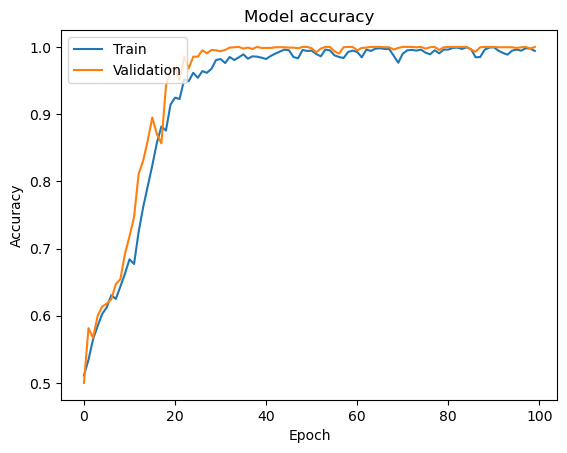

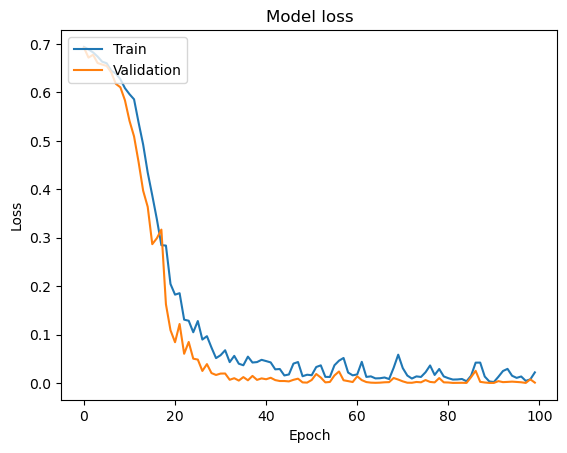

In [53]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plot_training_curves(history)

1/1 [==============================] - 0s 25ms/step


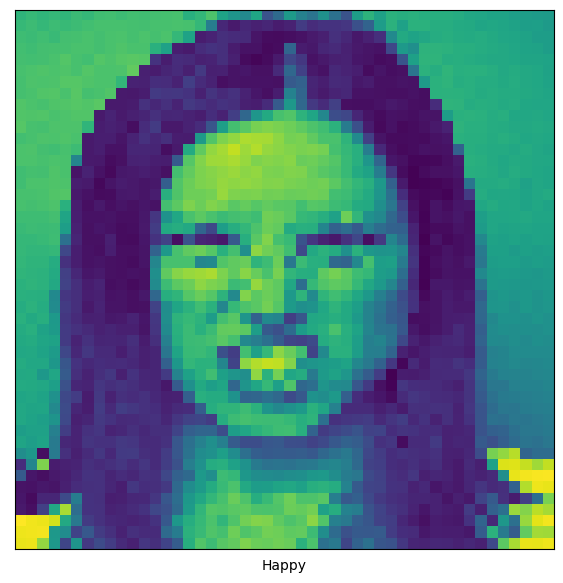

In [64]:
uploaded_img_path = "A07.jpeg"
uploaded_img = cv.imread(uploaded_img_path, cv.IMREAD_GRAYSCALE)
uploaded_img = uploaded_img / 255.
uploaded_img = cv.resize(uploaded_img, (48, 48))
fig = plt.figure(figsize=(7, 7))

plt.imshow(uploaded_img)
plt.xticks([])
plt.yticks([])

uploaded_img = uploaded_img.reshape(-1, 48, 48, 1)
prediction = model.predict(uploaded_img)

plt.xlabel(class_names[np.argmax(prediction)])

plt.show()